In [210]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [244]:
def graficar(r,x):
    fig, ax = plt.subplots();
    ax.scatter(r,x,s=0.1);
def normalizar(x):
    xn = [];
    xi = min(x);
    xf = max(x);
    print(xi,xf);
    m = 1000/(xf-xi);
    b = -m*xi;
    for i in range(len(x)):
        xn.append(int(m*x[i]+b));
    return xn

In [212]:
# Feingenbaum, funcion logistica de bifurcacion
def Feigenbaum_bifurcacion(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = r[i]*x[i]*(1-x[i]);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [213]:
# Feingenbaum, funcion logistica exponencial
def Feigenbaum_exponencial(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = x[i]*math.exp(r[i]*(1-x[i]));
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [214]:
# Feingenbaum, funcion logistica cubica
def Feigenbaum_cubica(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = x[i]+r[i]*x[i]*(x[i]*x[i]-1);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [215]:
# Feingenbaum, funcion logistica trianglar
def Feigenbaum_triangular(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        if x[i]<0.5:
            x[i+1] = r[i]*x[i];
        else:
            x[i+1] = r[i]*(1-x[i]);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [216]:
# Henon
def Henon(n,dr,fase,r0):
    x0 = 0.8;
    y0 = 0.8;
    a = 1.1;
    b = 0.4;
    r = [r0];
    x = [x0];
    y = [y0];
    xf = [x0];
    yf = [y0];
    for i in range(n):
        x.append(0);
        y.append(0);
        xf.append(0);
        yf.append(0);
        r.append(r[i]+dr);
        x[i+1] = 1-a*x[i]*x[i]+y[i];
        y[i+1] = b*x[i];
        xf[i+1] = x[i-fase];
        yf[i+1] = y[i-fase];
    return r,x,y,xf,yf;

In [217]:
# Rossler
def Rossler(n,dr):
    r0 = 0;
    x0 = 0;
    y0 = 3.3;
    z0 = 0;
    alpha = 0.1;
    beta = 0.1;
    gamma = 8;
    r = [r0];
    xp = [x0];
    yp = [y0];
    zp = [z0];
    xc = [x0];
    yc = [y0];
    zc = [z0];
    for i in range(n):
        xp.append(0);
        yp.append(0);
        zp.append(0);
        xc.append(0);
        yc.append(0);
        zc.append(0);
        r.append(r[i]+dr);
        xp[i+1] = xp[i]+dr*(-yp[i]-zp[i]);
        yp[i+1] = yp[i]+dr*(xp[i]-alpha*yp[i]);
        zp[i+1] = zp[i]+dr*(beta+zp[i]*(xp[i]-gamma));
        xc[i+1] = xp[i]+dr/2*(-yp[i]-zp[i]-yp[i+1]-zp[i+1]);
        yc[i+1] = yp[i]+dr/2*(xp[i]-alpha*yp[i]+xp[i+1]-alpha*yp[i+1]);
        zc[i+1] = zp[i]+dr/2*(beta+zp[i]*(xp[i]-gamma)+beta+zp[i+1]*(xp[i+1]-gamma));
    return r,xc,yc,zc;

In [228]:
def RedLSTM(x):
    # Ejemplo de serie temporal
    data = np.array(x) #np.sin(np.linspace(0, 100, 1000))  # Datos de ejemplo (seno)
    data = data.reshape(-1, 1)  # Reestructurar los datos para ser un array 2D

    # Escalar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    # Dividir los datos en entrenamiento y prueba
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    
    time_step = 10
    X_train, y_train = create_sequences(train, time_step)
    X_test, y_test = create_sequences(test, time_step)

    # Reshape input to be [samples, time steps, features] que es el formato esperado por LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # Crear el modelo LSTM
    model = Sequential()
    model.add(LSTM(20, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(20, return_sequences=False))
    model.add(Dense(1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=25, batch_size=1, verbose=1)
    
    # Hacer predicciones
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invertir la escala de las predicciones para tener los valores originales
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # Invertir la escala de los valores originales para la comparación
    y_train = scaler.inverse_transform([y_train])
    y_test = scaler.inverse_transform([y_test])
    
    # Calcular el error cuadrático medio (RMSE)
    train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
    test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

    print(f'Error cuadrático medio del entrenamiento: {train_score}')
    print(f'Error cuadrático medio de la prueba: {test_score}')
    
    # Desplazar las predicciones de entrenamiento para plotear
    train_predict_plot = np.empty_like(data)
    train_predict_plot[:, :] = np.nan
    train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

    # Desplazar las predicciones de prueba para plotear
    test_predict_plot = np.empty_like(data)
    test_predict_plot[:, :] = np.nan
    test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

    # Plotear los datos originales y las predicciones como puntos
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(data)), scaler.inverse_transform(data), label='Datos originales', color='blue', s=10)
    plt.scatter(range(time_step, len(train_predict) + time_step), train_predict, label='Predicción de entrenamiento', color='green', s=10)
    plt.scatter(range(len(train_predict) + (time_step * 2) + 1, len(data) - 1), test_predict, label='Predicción de prueba', color='red', s=10)
    plt.legend()
    plt.show()
    
    return test_predict,train_predict

In [219]:
def create_sequences(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0385
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0059
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0028
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.2230e-04
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 4.2455e-04
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 3.3491e-04
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 2.7444e-04
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.9568e-04
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.7794e-04
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.2192e-04
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.1544e-04
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.1641e-04
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 9.1189e-05
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step -

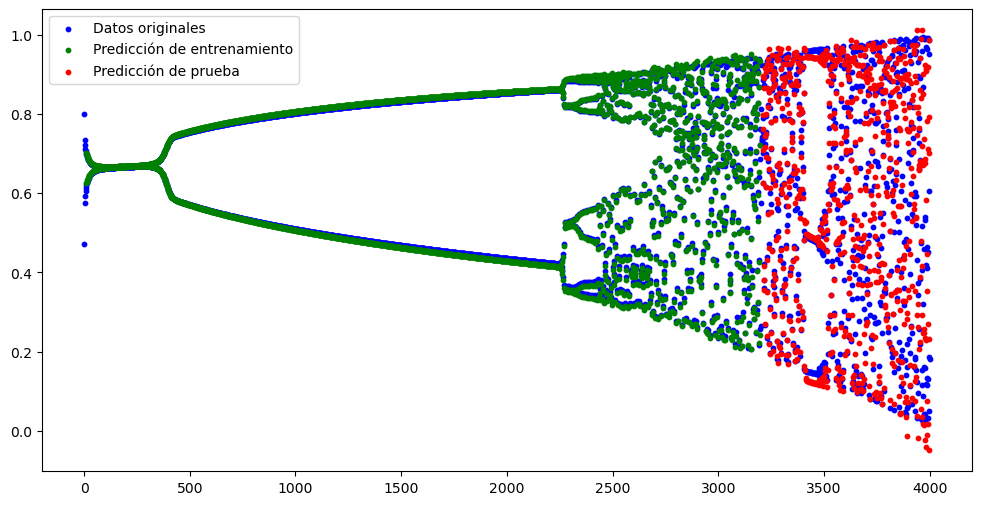

In [230]:
r_1,x_1,xf_1 = Feigenbaum_bifurcacion(4000,0.00026,2,2.95);
x1_test_predict,x1_train_predict = RedLSTM(x_1)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0040
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0037
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0027
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0021
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0024
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0018
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0017
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0015
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0014
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0014
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0013
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0013
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0011
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0012
Epoch 15/25
3189/3189 ━━━━

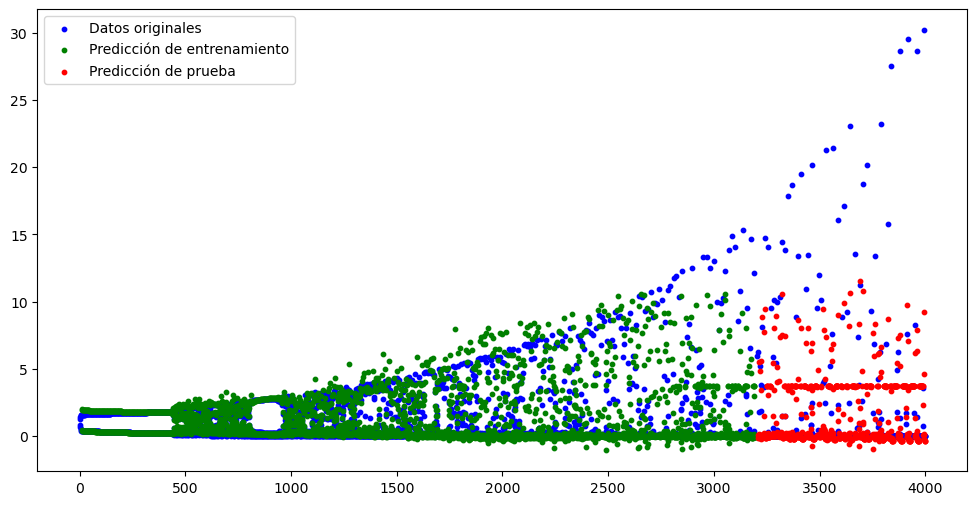

In [229]:
r_2,x_2,xf_2 = Feigenbaum_exponencial(4000,0.001,2,2.3);
x2_test_predict,x2_train_predict = RedLSTM(x_2)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0420
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0055
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0045
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0038
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0038
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0024
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0023
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0021
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0020
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0019
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0016
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0018
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0014
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0014
Epoch 15/25
3189/3189 ━━━━

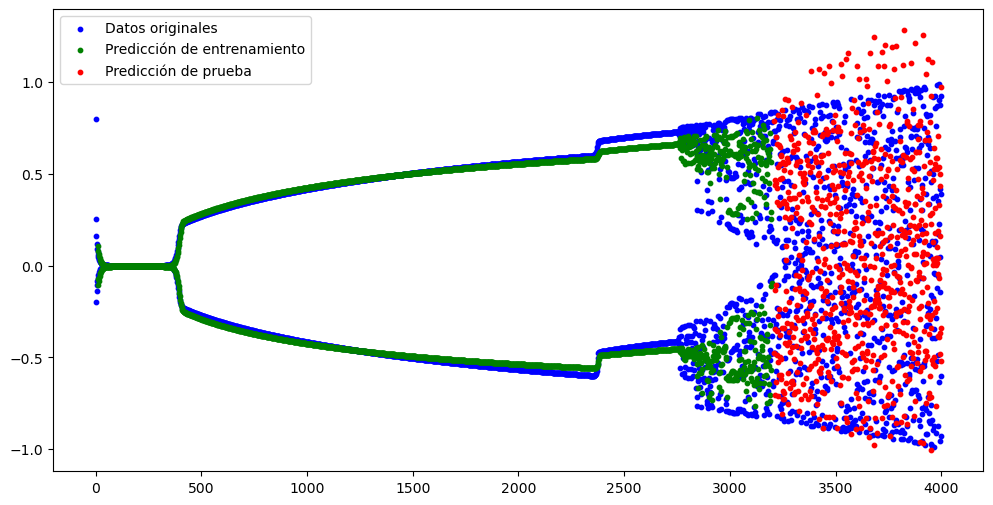

In [231]:
r_3,x_3,xf_3 = Feigenbaum_cubica(4000,0.00052,1,1.9);
x3_test_predict,x3_train_predict = RedLSTM(x_3)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0198
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0075
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0033
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 8.5151e-04
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 5.6132e-04
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 4.6750e-04
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 3.9461e-04
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 3.6487e-04
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.8562e-04
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 3.0136e-04
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.6464e-04
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 2.5655e-04
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 2.3176e-04
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step -

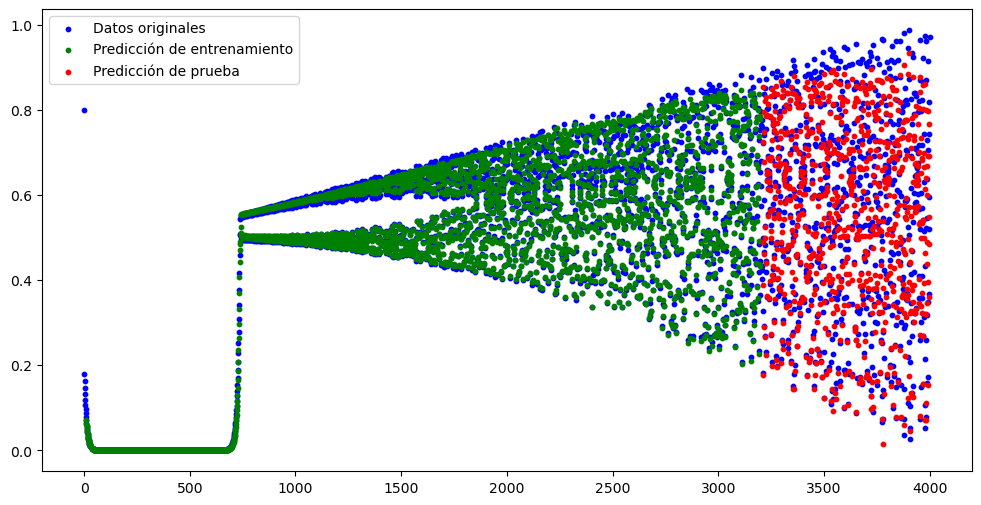

In [232]:
r_4,x_4,xf_4 = Feigenbaum_triangular(4000,0.00028,2,0.9);
x4_test_predict,x4_train_predict = RedLSTM(x_4)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.0808
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0367
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0035
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 5.7210e-04
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 2.7767e-04
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.6059e-04
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.3173e-04
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.2826e-04
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.2732e-04
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 9.1042e-05
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 6.9755e-05
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 8.1415e-05
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.0992e-05
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step -

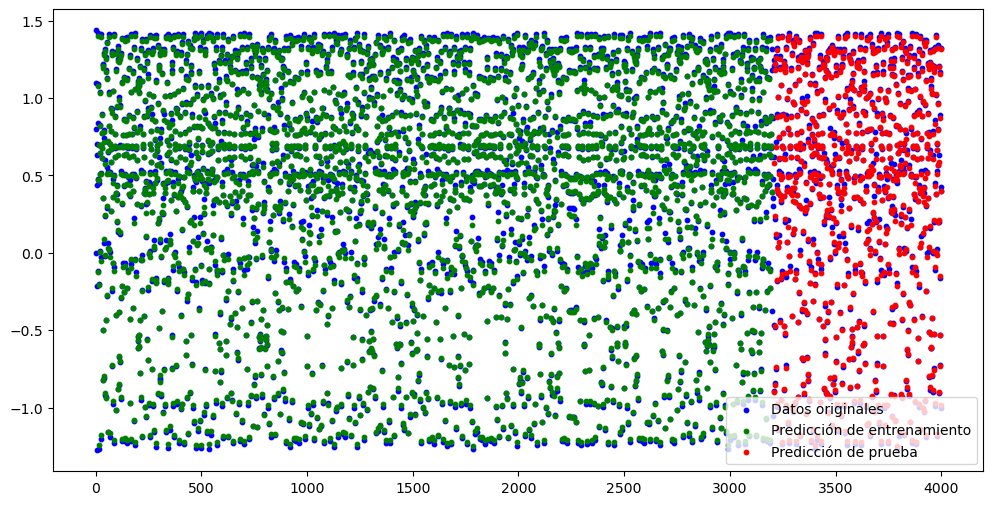

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 0.0557
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0047
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0015
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 8.0875e-04
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 3.2385e-04
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.2071e-04
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.0831e-04
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 5.9913e-05
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 5.3689e-05
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 3.4287e-05
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 4.1936e-05
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 5.0243e-05
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 4.5597e-05
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step -

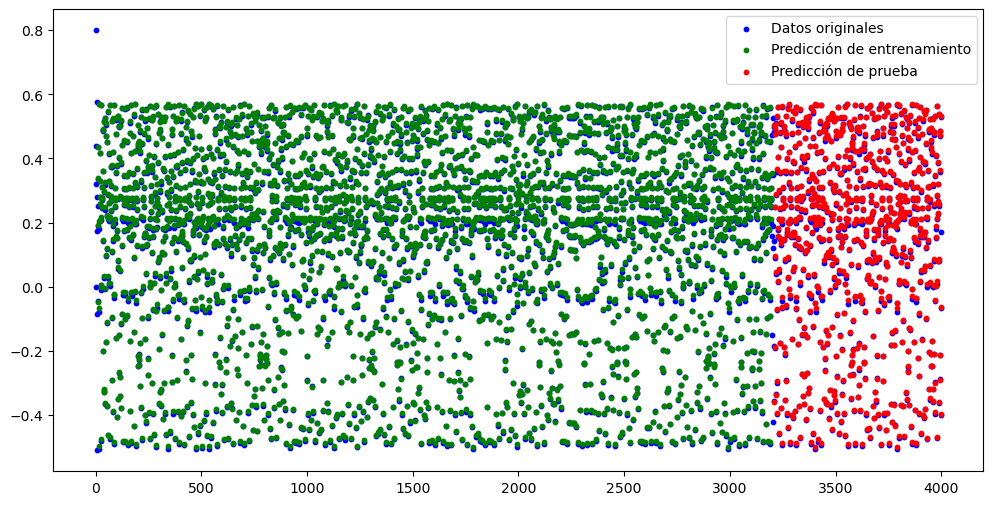

In [233]:
r_5,x_5,y_5,xf_5,yf_5 = Henon(4000,0.0001,1,0);
x5_test_predict,x5_train_predict = RedLSTM(x_5)
y5_test_predict,y5_train_predict = RedLSTM(y_5)

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0085
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.6059e-04
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.7591e-04
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.1335e-05
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.0567e-05
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.4478e-05
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.2549e-05
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.0287e-05
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.8007e-05
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.9576e-05
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.3248e-05
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5.9676e-06
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.8815e-06
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3m

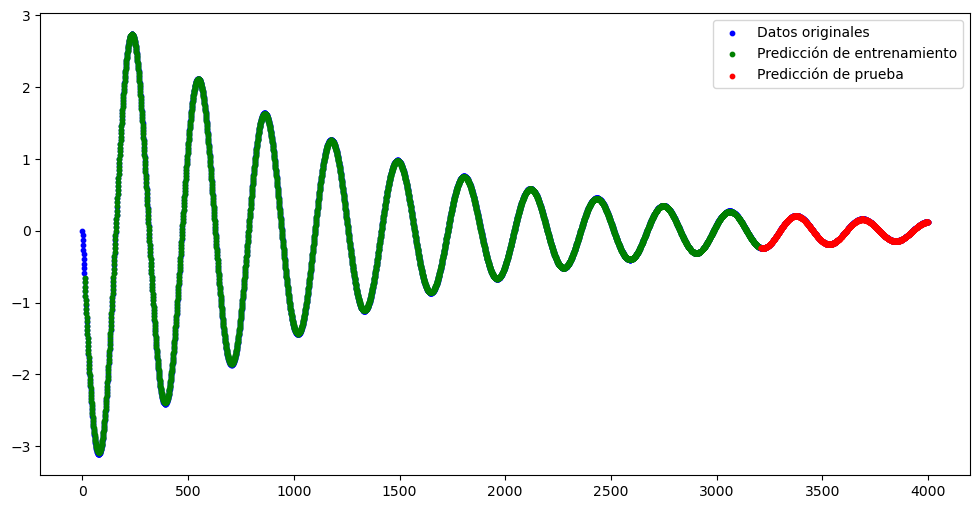

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0054
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.9145e-04
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.3404e-04
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.5161e-05
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.1411e-05
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.5843e-05
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 8.9446e-06
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 8.3668e-06
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.9690e-06
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6.4794e-06
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.5374e-06
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.1794e-05
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.8417e-06
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3m

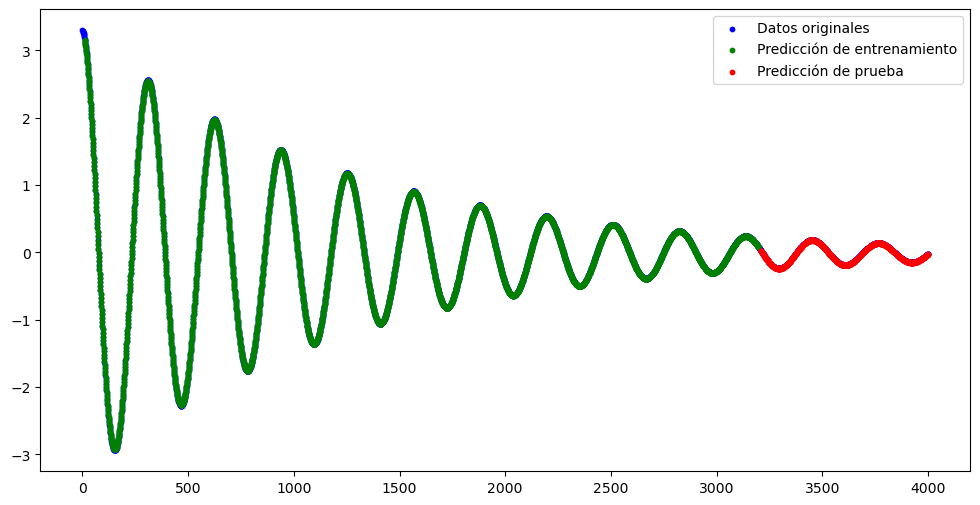

Epoch 1/25


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3189/3189 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0120
Epoch 2/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.4420e-04
Epoch 3/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.6531e-04
Epoch 4/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 8.0902e-05
Epoch 5/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 3.1127e-05
Epoch 6/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.0225e-05
Epoch 7/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 7.1783e-06
Epoch 8/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 9.0808e-06
Epoch 9/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 7.3334e-06
Epoch 10/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.0483e-05
Epoch 11/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 9.9787e-06
Epoch 12/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 3.5703e-06
Epoch 13/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 5.9740e-06
Epoch 14/25
3189/3189 ━━━━━━━━━━━━━━━━━━━━ 10s 3m

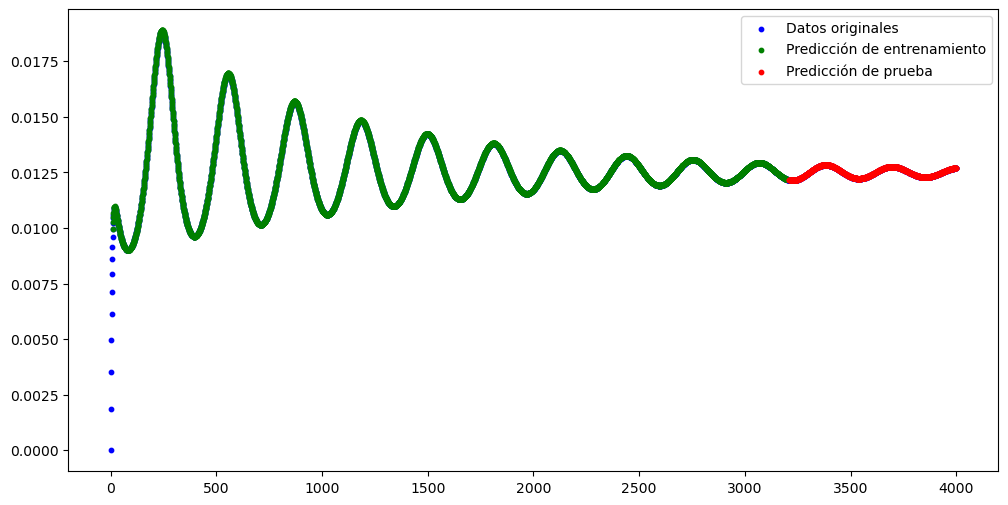

In [234]:
r,x,y,z = Rossler(4000,0.02);
x_test_predict,x_train_predict = RedLSTM(x)
y_test_predict,y_train_predict = RedLSTM(y)
z_test_predict,z_train_predict = RedLSTM(z)

In [235]:
def mover(direccion,distancia,x,y,p,ancho,alto):
    #pr = [0,125,250,375,500,625,750,875,1000]
    pr = [100,200,250,450,500,700,750,950,1000]
    pd = [0,250,500,750,1000]
    #pd = [0,100,200,400,1000]
    signox = 0; signoy = 0; reb = 0; p = p; d = 0
    # Distancia a recorrer (1,2,3,4 pixeles)
    if int(pd[0]) <= int(distancia) < int(pd[1]): d = 3
    if int(pd[1]) <= int(distancia) < int(pd[2]): d = 4
    if int(pd[2]) <= int(distancia) < int(pd[3]): d = 5
    if int(pd[3]) <= int(distancia) <= int(pd[4]): d = 6
    #else: d = 0
    # UF
    if direccion >= pr[0] and direccion < pr[1]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d  
    # FD
    if direccion >= pr[1] and direccion < pr[2]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # U
    if direccion >= pr[2] and direccion < pr[3]:
        for i in range(d):
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            y = y+((-1)**signoy)*p*d
    # F
    if direccion >= pr[3] and direccion < pr[4]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
    # B
    if direccion >= pr[4] and direccion < pr[5]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
    # D
    if direccion >= pr[5] and direccion < pr[6]:
        for i in range(d):
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            y = y-((-1)**signoy)*p*d
    # DB
    if direccion >= pr[6] and direccion < pr[7]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # UB
    if direccion >= pr[7] and direccion < pr[8]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d
            
    return x,y,reb,p*d

In [236]:
def dibujar(rebotes,ancho,alto,p,k,serie,inicio):
    #setup(ancho, alto, 0, 0)
    #screensize(3000, 3000)
    # Condiciones iniciales
    x0 = int(serie[0+inicio])
    y0 = int(serie[1+inicio])
    xp = [x0]
    yp = [y0]
    area_cubierta = set([(x0, y0)])  # Añade posición inicial
    areas_por_paso = [1]
    dist_rec = 0
    #penup()
    #goto(x0, y0)
    #pendown()
    for i in range(1,k):
        dire = serie[2*i+inicio]
        dist = serie[2*i+1+inicio]
        x,y,re,d = mover(dire,dist,x0,y0,p,ancho,alto)
        dist_rec = dist_rec + d
        rebotes = rebotes + re
        #pensize(3*p)
        #pencolor(0.1, 0.5, 1)
        #goto(x, y)
        x0 = x
        y0 = y
        xp.append(x)
        yp.append(y)
        area_cubierta.add((x, y))  # Registra nueva posición
        areas_por_paso.append(len(area_cubierta))  # Actualiza el área cubierta
    fig, ax = plt.subplots(figsize=(10, 11))
    plt.title('Movimiento Browniano.')
    #plt.grid(True)
    ax.plot(xp, yp)
    fig, ax2 = plt.subplots(figsize=(10, 11))
    plt.title('Evolucion del area ocupada.')
    plt.grid(True)
    ax2.plot(areas_por_paso)
    #exitonclick()
    return rebotes,dist_rec

In [253]:
def movimiento_browniano(x):
    xn = normalizar(x)
    #xnm = mezclar_lista(xn)
    rebotes = 0
    iniciop = 0 # porcentaje parte final de tamano del arreglo
    inicio = int(iniciop/100*len(xn))
    # Tamaño de la imagen
    ancho = 2000
    alto = 2000
    k = int((100-iniciop)/100*len(xn)/2)
    # Tamaño del pixel
    p = 1
    rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,xn,inicio)
    print(rebotes,dist_rec)

[-0.04894359] [1.0112215]
2547 9268


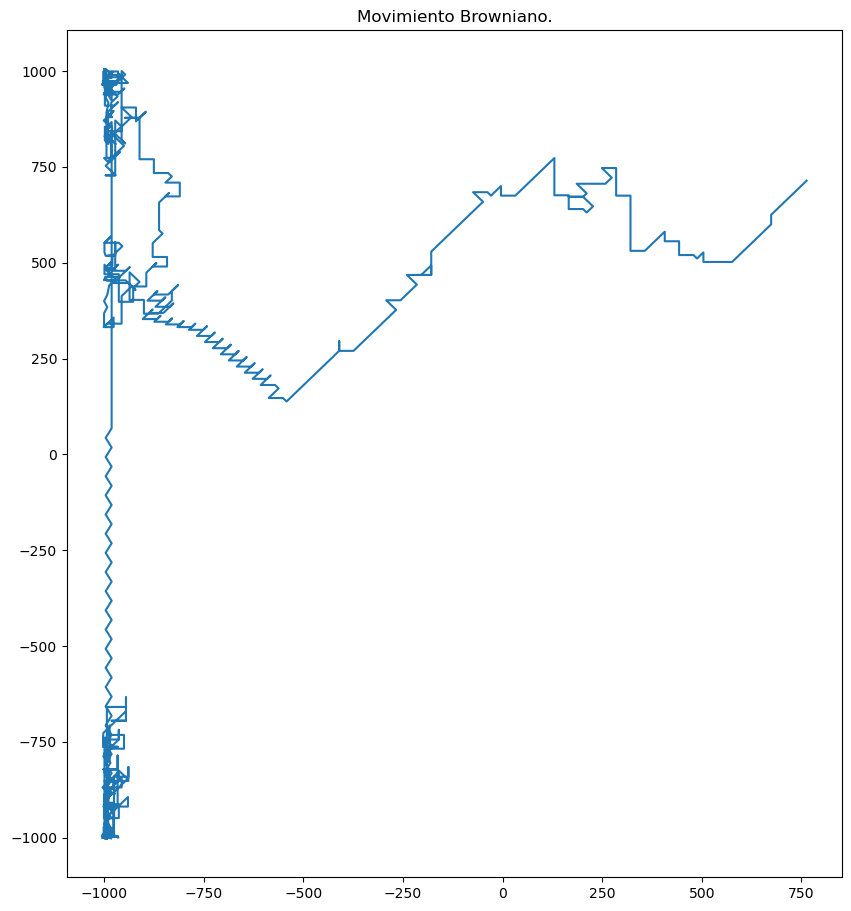

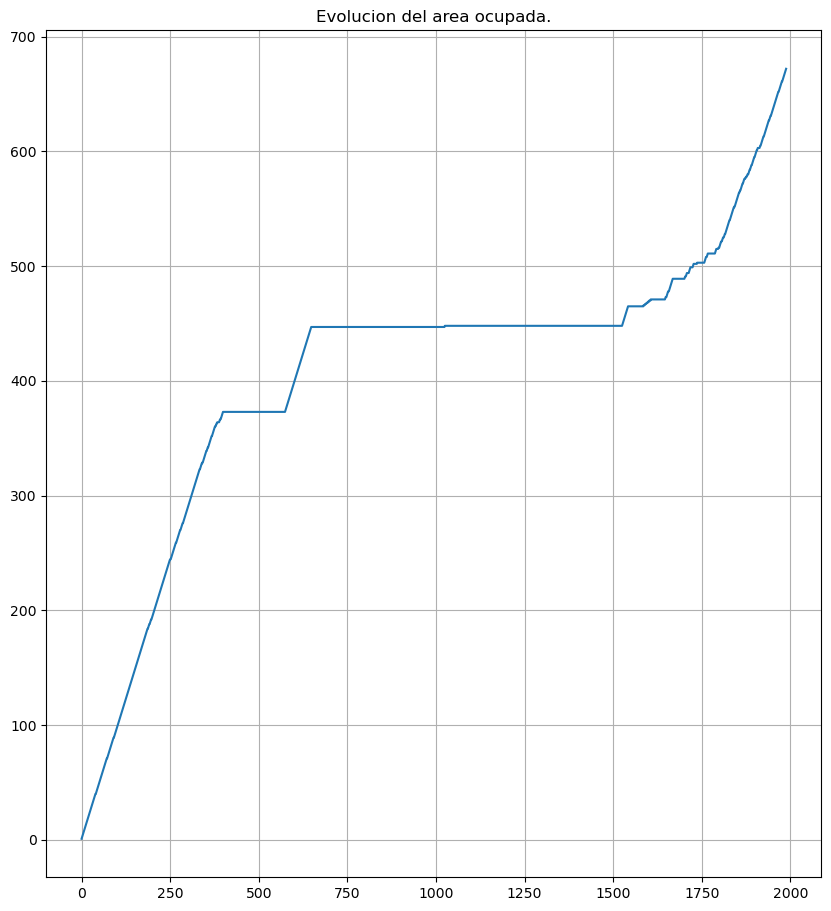

In [254]:
movimiento_browniano(np.concatenate((x1_test_predict,x1_train_predict)))

[-1.0498343] [11.532696]
974 6587


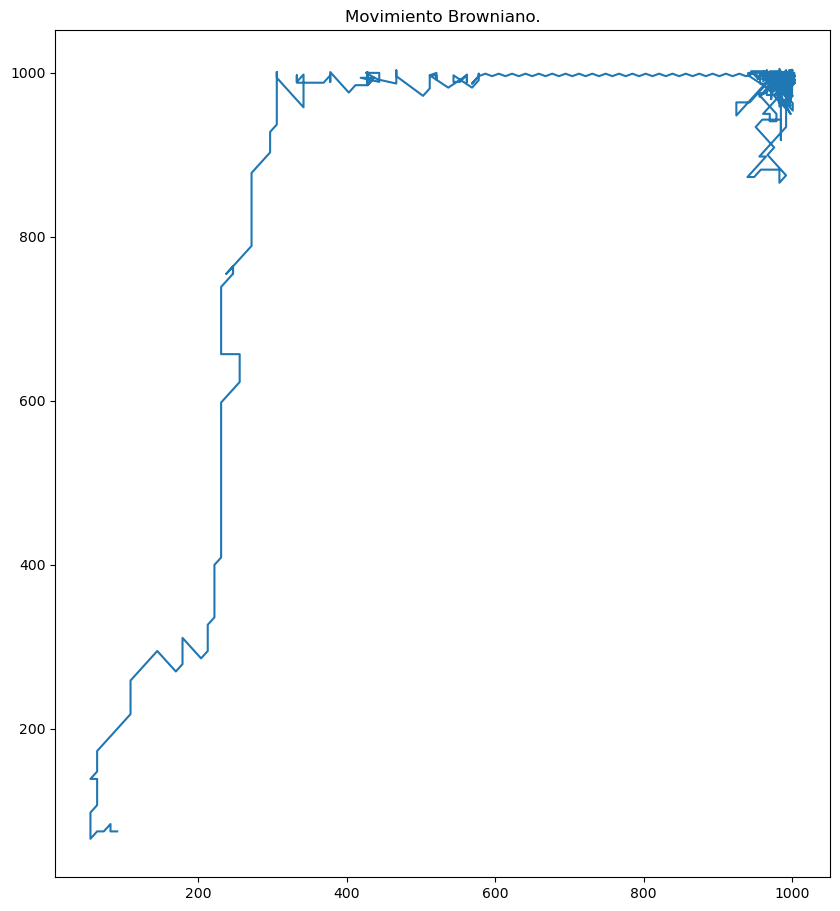

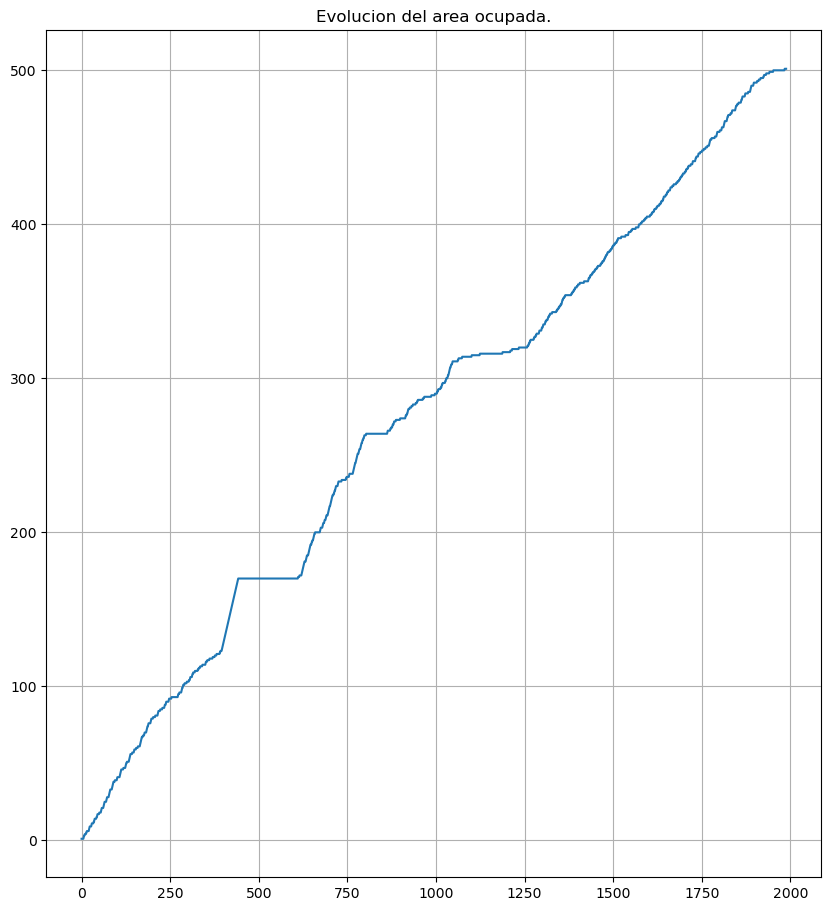

In [255]:
movimiento_browniano(np.concatenate((x2_test_predict,x2_train_predict)))

[-1.0054761] [1.2819021]
2043 9548


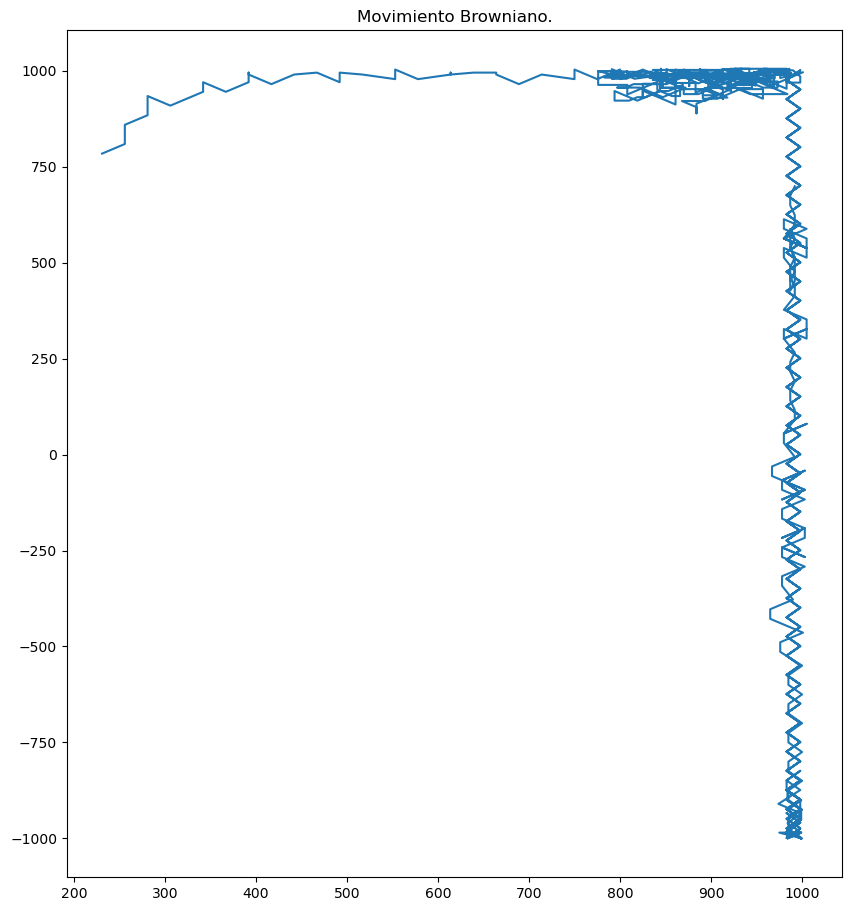

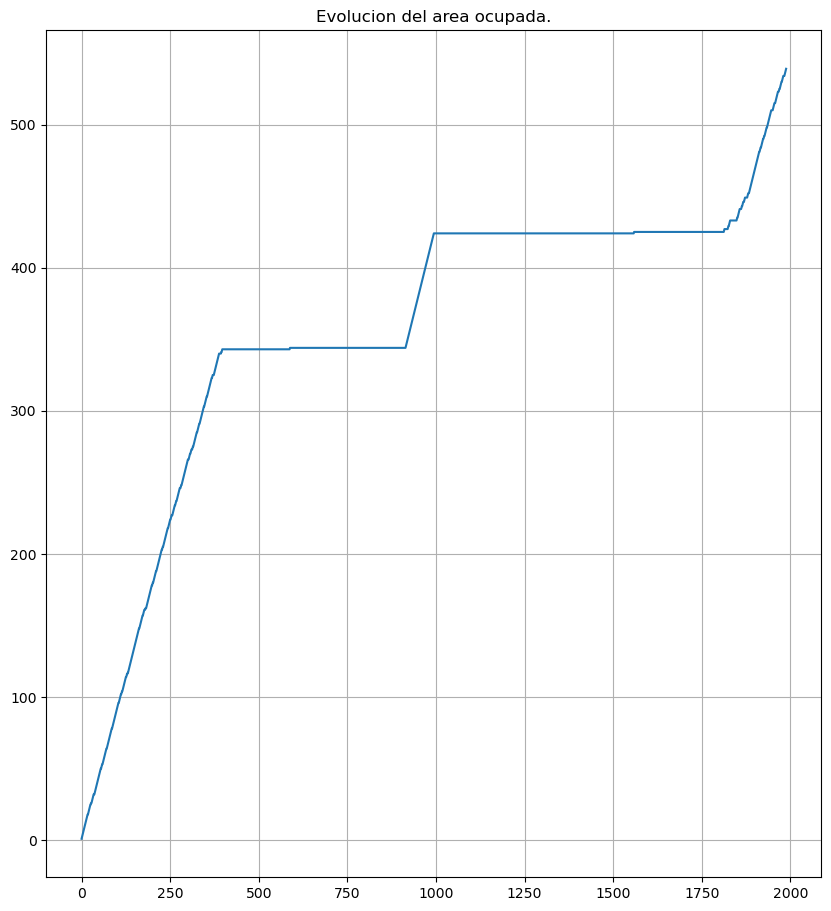

In [256]:
movimiento_browniano(np.concatenate((x3_test_predict,x3_train_predict)))

[5.492614e-05] [0.93440086]
954 9095


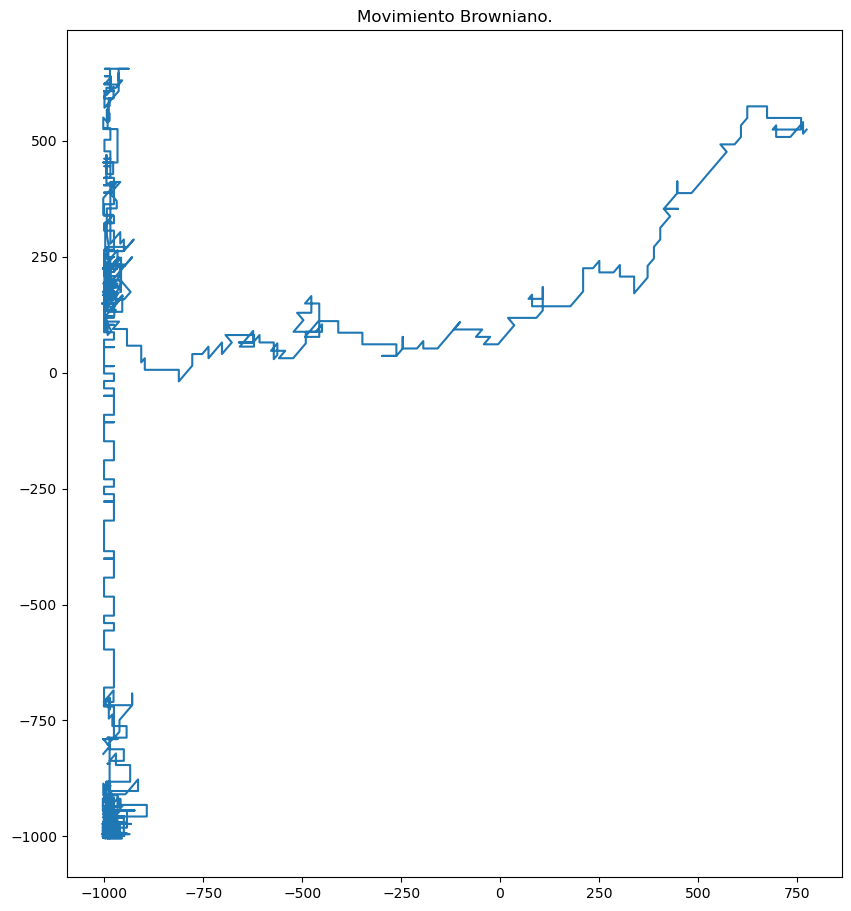

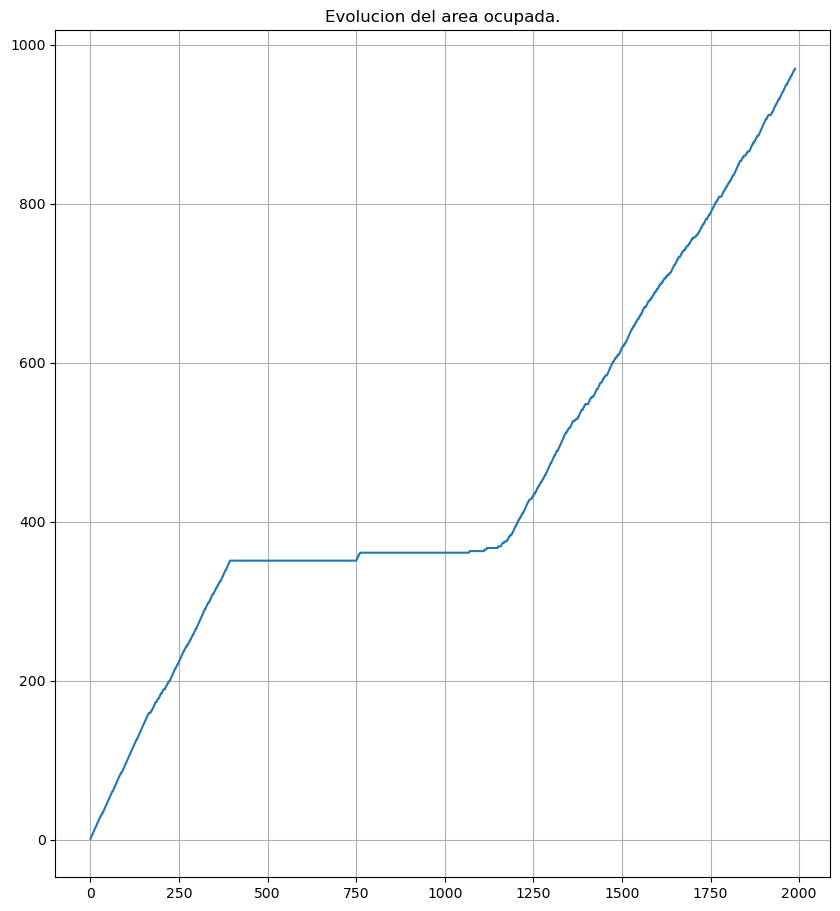

In [257]:
movimiento_browniano(np.concatenate((x4_test_predict,x4_train_predict)))

[-1.2470114] [1.4050659]
480 11208


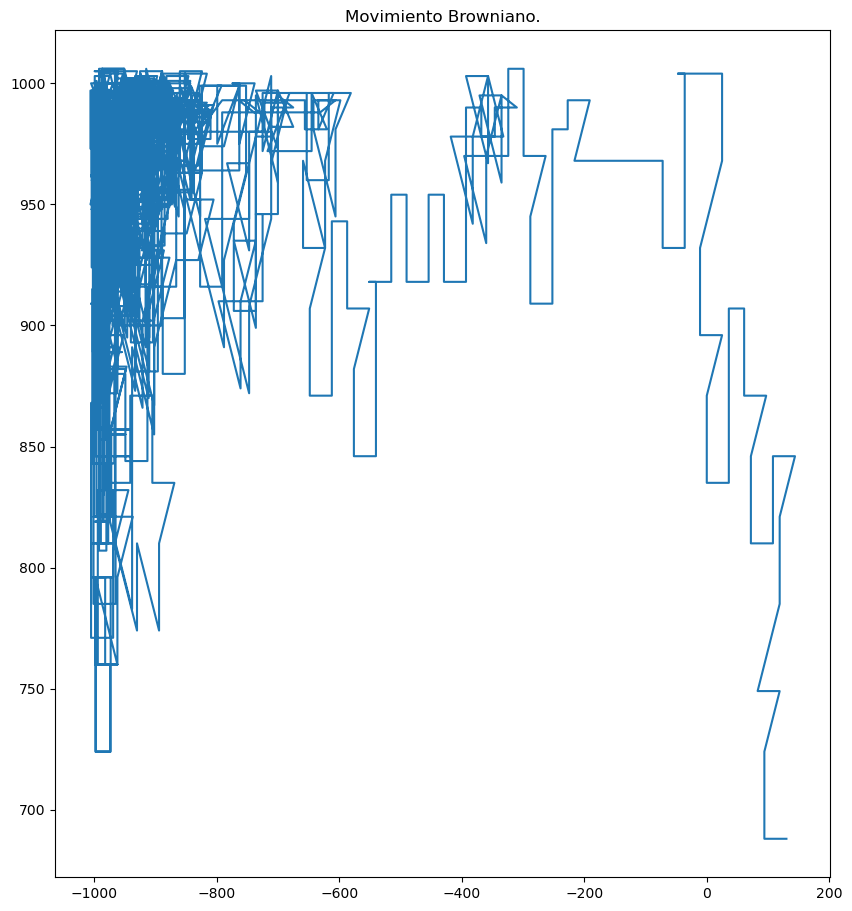

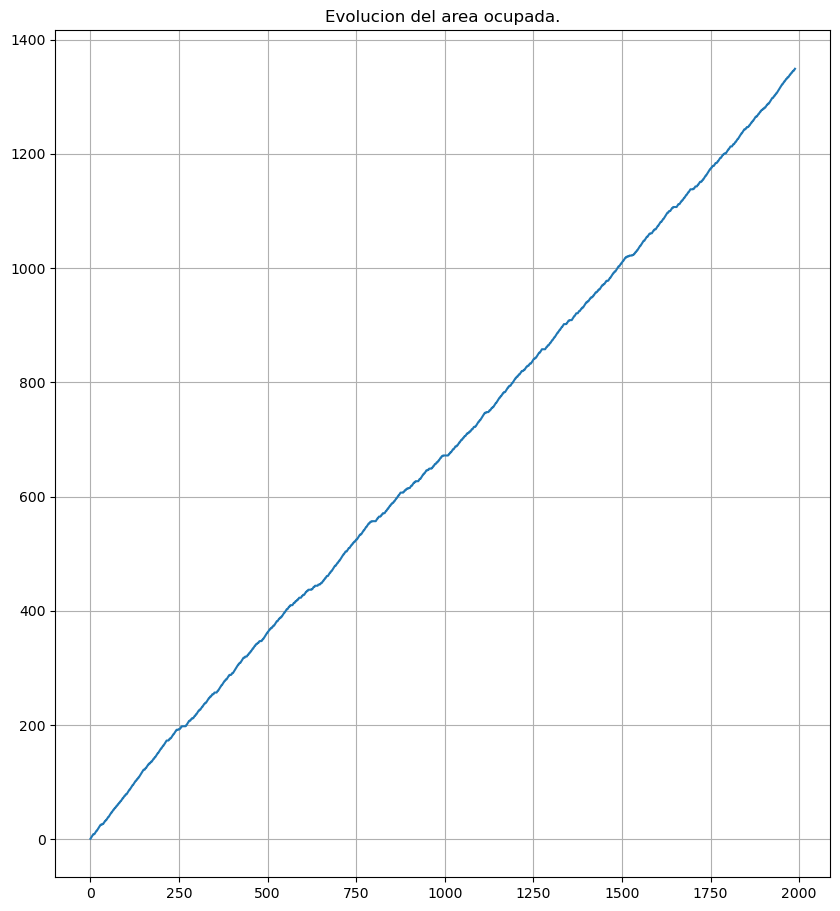

In [258]:
movimiento_browniano(np.concatenate((x5_test_predict,x5_train_predict)))

[-0.5007677] [0.57139885]
1853 8324


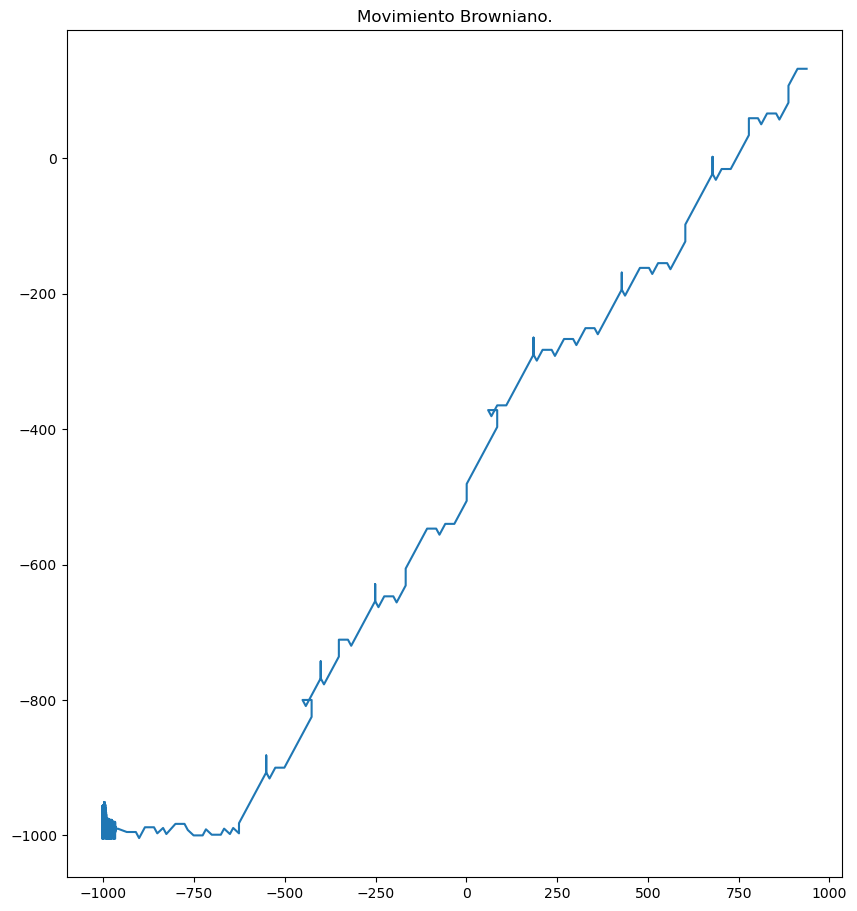

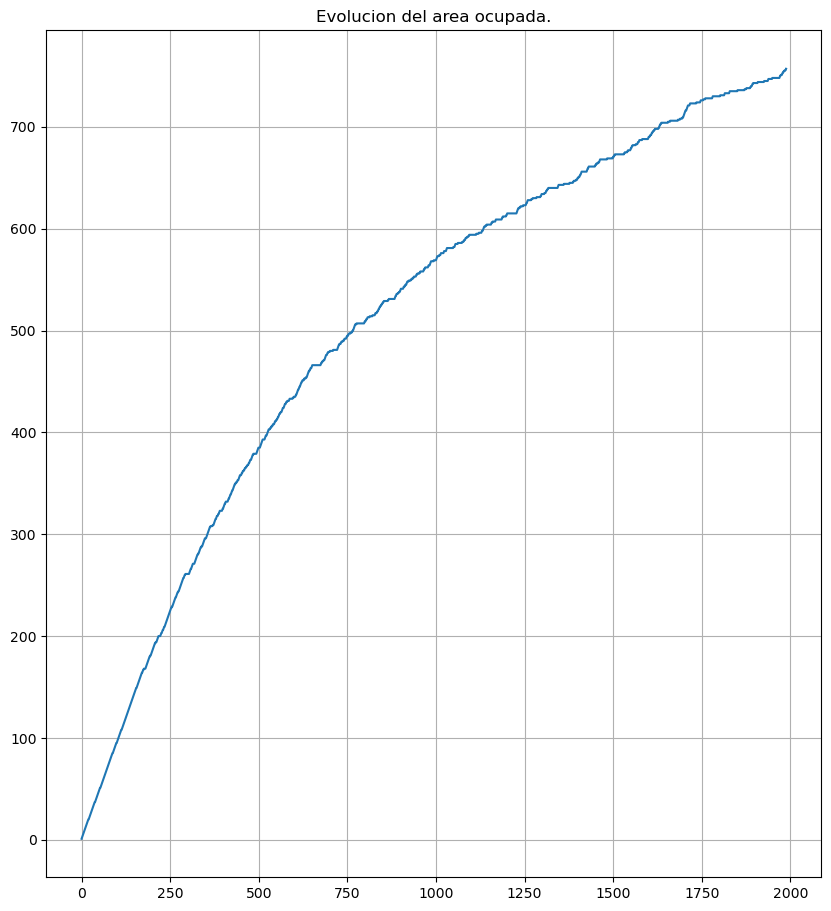

In [259]:
movimiento_browniano(np.concatenate((y5_test_predict,y5_train_predict)))

[-3.090129] [2.7343724]
895 9245


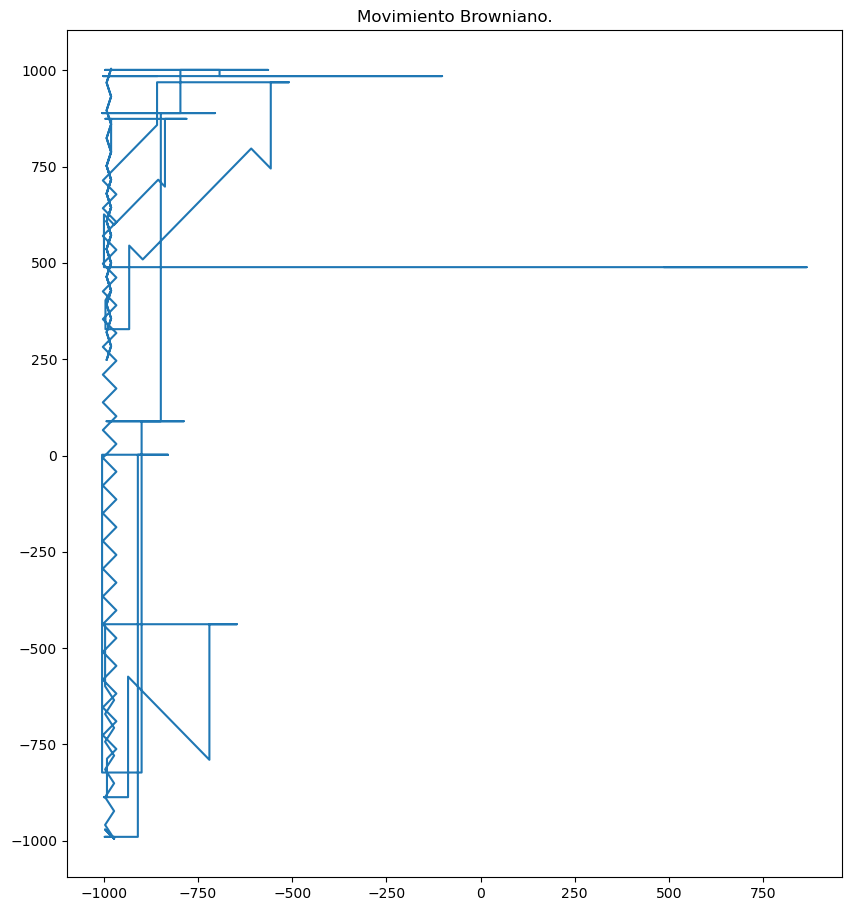

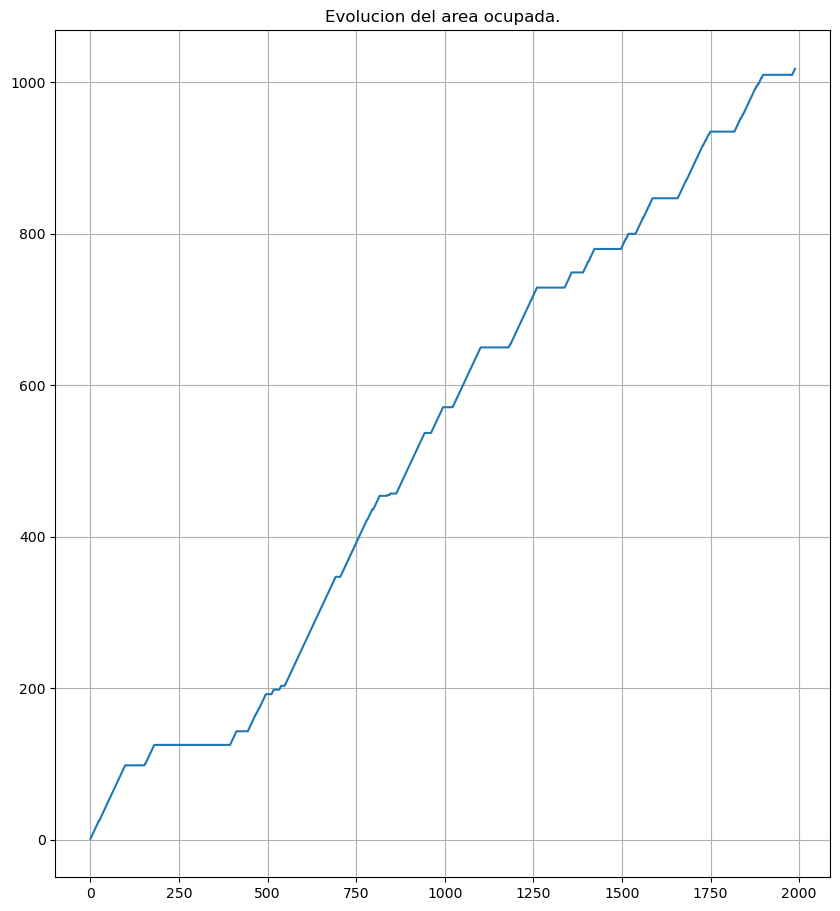

In [260]:
movimiento_browniano(np.concatenate((x_test_predict,x_train_predict)))

[-2.9232657] [3.1523697]
728 8692


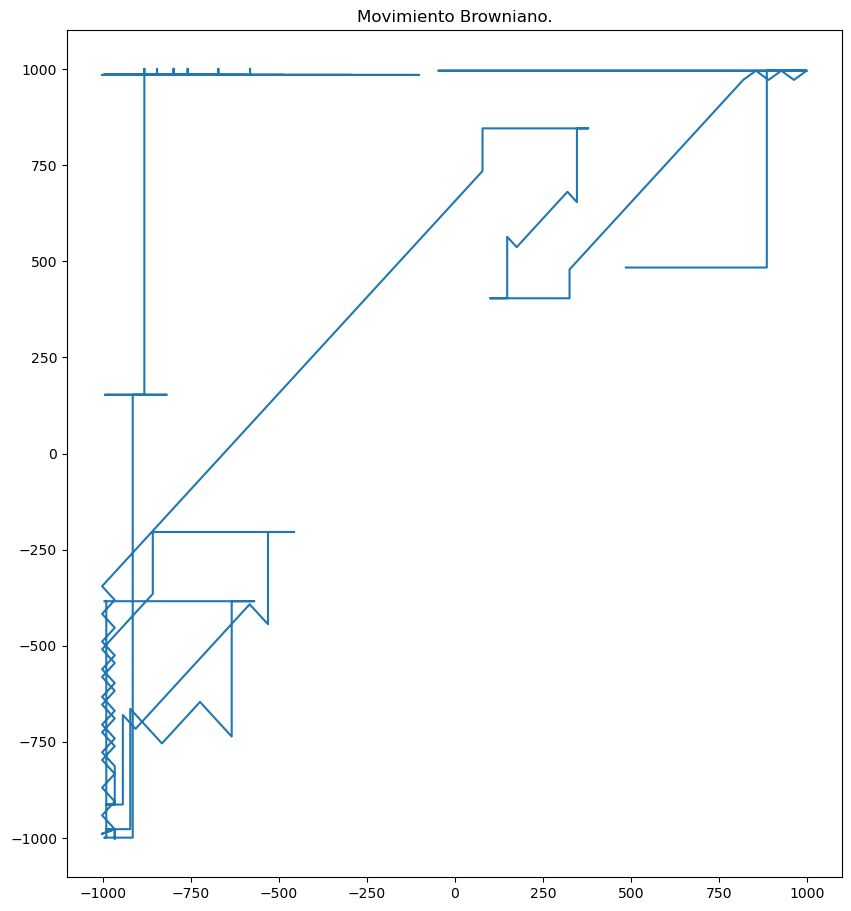

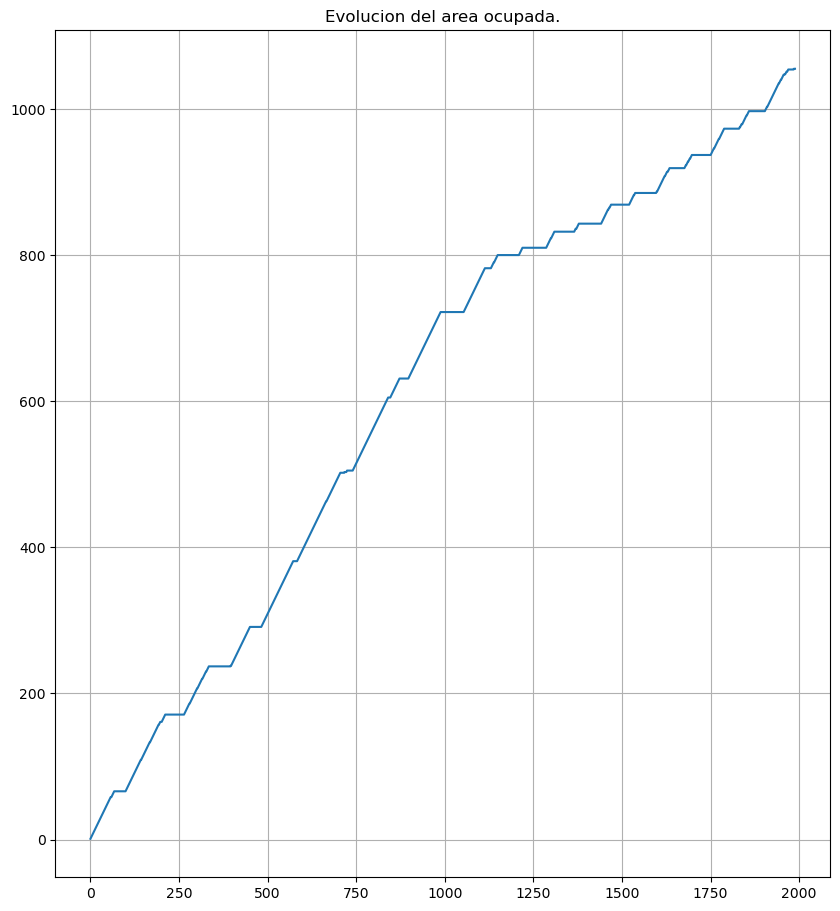

In [261]:
movimiento_browniano(np.concatenate((y_test_predict,y_train_predict)))

[0.0090001] [0.01889335]
1255 7942


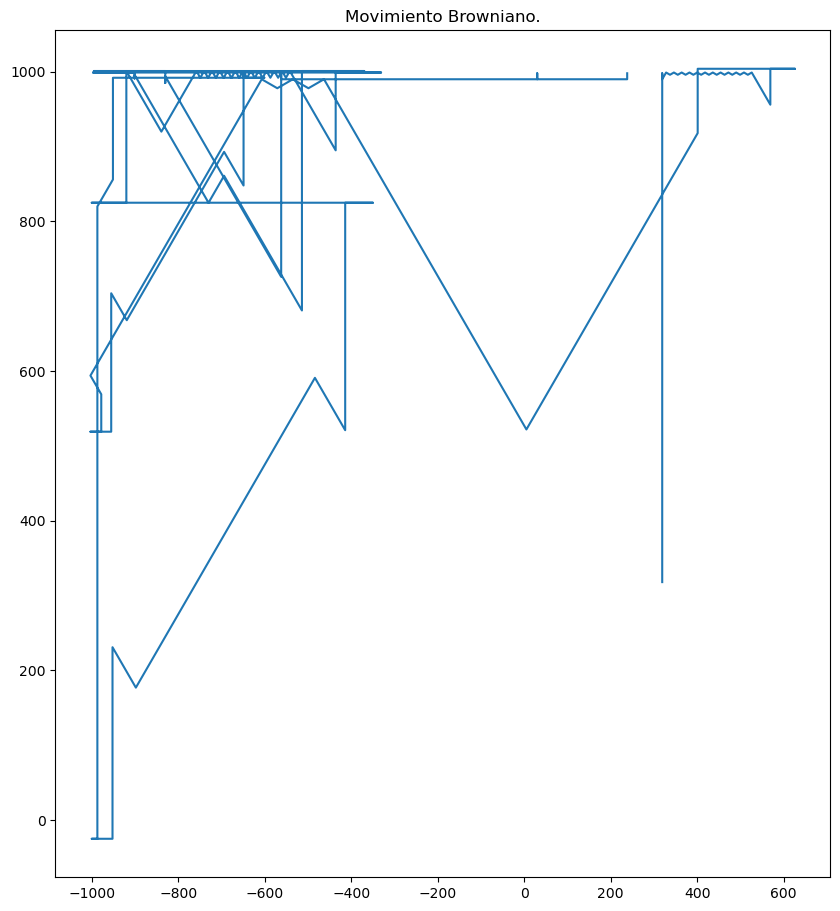

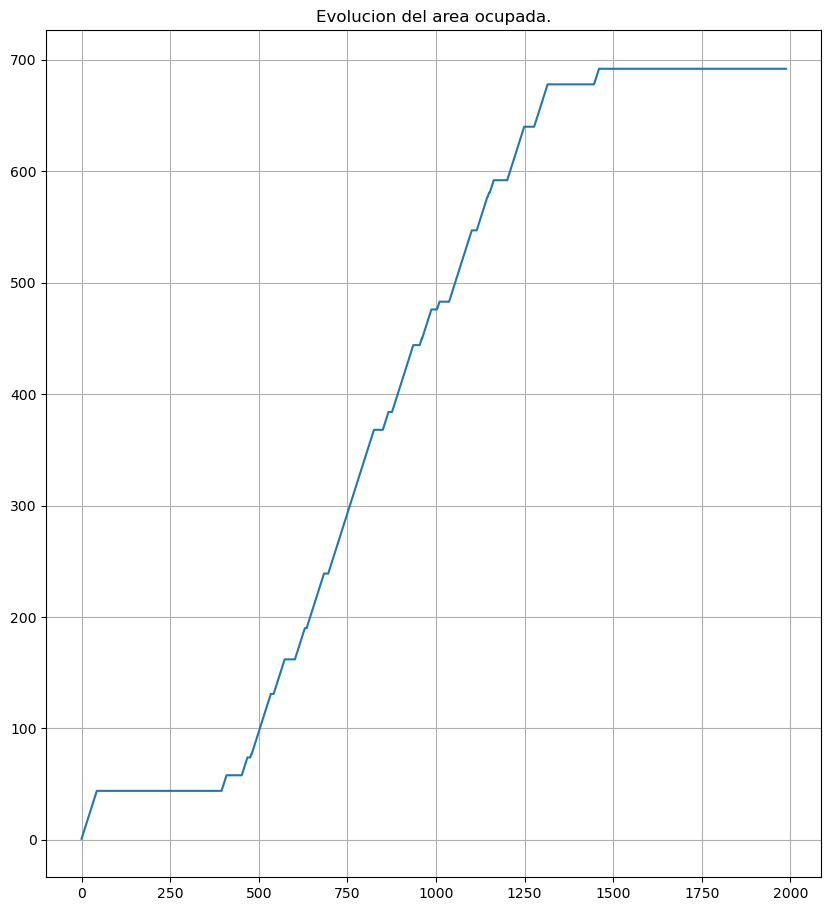

In [262]:
movimiento_browniano(np.concatenate((z_test_predict,z_train_predict)))